In [2]:
# Data obtaining and loading
import pandas as pd #data frame operation
import numpy as np #array and math functions
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
coaches8=pd.read_csv("/Users/shubham/Desktop/MSIM/SEM3/IST 718/My files/WEEK 1,2,3/LAB 3/Coaches8.csv") #orginal data frame
rates=pd.read_csv("/Users/shubham/Desktop/MSIM/SEM3/IST 718/My files/WEEK 1,2,3/LAB 3/GSR_FGR_State.csv") # GSR and FGR rates
stadium_size=pd.read_csv("/Users/shubham/Desktop/MSIM/SEM3/IST 718/My files/WEEK 1,2,3/LAB 3/Stadium_size.csv") # stadium sizes

FileNotFoundError: [Errno 2] File b'/Users/shubham/Desktop/MSIM/SEM3/IST 718/My files/WEEK 1,2,3/LAB 3/Coaches8.csv' does not exist: b'/Users/shubham/Desktop/MSIM/SEM3/IST 718/My files/WEEK 1,2,3/LAB 3/Coaches8.csv'

In [ ]:
coaches8['School']= coaches8['School'].str.strip()
rates['School']= rates['School'].str.strip()

Grad_rates= rates
Coaches=coaches8
Stadiums= stadium_size
Coaches.columns = list(Coaches.columns.str.lower())
Stadiums.columns = list(Stadiums.columns.str.lower())
Grad_rates.columns = list(Grad_rates.columns.str.lower())
print(Stadiums.columns)
print(Grad_rates.columns)
print(Coaches.columns)
Stadiums.shape

In [ ]:
# dropping "Expanded" , "conference" and "div" from stadium size
Stadiums= Stadiums.drop(Stadiums.columns[[6,7,8]], axis=1)

# dropping "cohort" , "Unnamed: 6" and "unnamed: 7" from Grat_rates
Grad_rates=Grad_rates.drop(Grad_rates.columns[[2]], axis=1)



# dropping "assistantpay" from Coaches  
Coaches=Coaches.drop(Coaches.columns[[7]], axis=1)


print(Grad_rates.head(6))

print(Grad_rates.tail())

type(Grad_rates)

# replacing '--' with null values
Coaches.loc[Coaches['schoolpay']=="--", 'schoolpay'] = np.nan
Coaches.loc[Coaches['totalpay']=="--", 'totalpay'] = np.nan
Coaches.loc[Coaches['bonus']=="--", 'bonus'] = np.nan
Coaches.loc[Coaches['bonuspaid']=="--", 'bonuspaid'] = np.nan
Coaches.loc[Coaches['buyout']=="--", 'buyout'] = np.nan
#Coaches.fillna(0, inplace=True)

#df[''] = pd.to_numeric(df['values'], errors='coerce')
#Coaches= Coaches[totalpay].replace('a',np.NaN)
#Coaches = Coaches.conevert_objects(convert_numeric= True).fillna(0)
#Coaches=Coaches.replace('NaN',0, inplace= True)
Coaches.head(3)

In [2745]:

Stadiums.rename(columns={'team': 'school'}, inplace=True)

# using loop to complete the errornous data that is common in both the dataframes
def incomplete_stads(coach, school):
    Coaches.loc[Coaches.coach == coach, 'school']= school
    
incomplete_data = { 'Dana Dimel': 'UTEP',  'Frank Wilson': 'UTSA','Gary Patterson': 'TCU','Jay Hopson': 'Southern Miss',
    'Charlie Strong': 'USF', 'Rod Carey': 'NIU', 'Dave Doeren': 'NC State','Tony Sanchez': 'UNLV','Chuck Martin': 'Miami (OH)','Mark Richt': 'Miami',
    'Mark Whipple': 'UMass','Turner Gill': 'Liberty Flames', 'Butch Davis': 'FIU','Joe Moglia': 'Coastal Carolina Chanticleers', 'Josh Heupel': 'UCF'}
for coach, school in incomplete_data.items():
    incomplete_stads(coach, school)
    
Coaches_Stadiums = pd.merge(Coaches, Stadiums, on='school', how='left')


Coaches_Stadiums.columns


Index(['school', 'conference_x', 'coach', 'schoolpay', 'totalpay', 'bonus',
       'bonuspaid', 'buyout', 'stadium', 'city', 'state', 'conference_y',
       'capacity', 'latitude', 'longitude'],
      dtype='object')

In [2746]:

#manually updating one record which is not matching the Stadiums data-set

Coaches_Stadiums.loc[Coaches_Stadiums.coach == 'Bill Clark', 'city'] = 'Birmingham'
Coaches_Stadiums.loc[Coaches_Stadiums.coach == 'Bill Clark', 'stadium'] = 'Legion Field'
Coaches_Stadiums.loc[Coaches_Stadiums.coach == 'Bill Clark', 'capacity'] = 71594
Coaches_Stadiums.loc[Coaches_Stadiums.coach == 'Bill Clark', 'latitude'] = 33.511389
Coaches_Stadiums.loc[Coaches_Stadiums.coach == 'Bill Clark', 'longitude'] = -86.842778
Coaches_Stadiums.loc[Coaches_Stadiums.coach == 'Bill Clark', 'state'] = 'AL'

In [2747]:
Coaches_Stadiums['totalpay'] = Coaches_Stadiums['totalpay'].str.replace(',', '')
Coaches_Stadiums['totalpay'] = Coaches_Stadiums['totalpay'].str.replace('$', '')
Coaches_Stadiums['totalpay'] = Coaches_Stadiums['totalpay'].replace('--', Coaches_Stadiums['totalpay'].replace(['--'], [None]))


In [2748]:
Coaches_Stadiums['bonus'] = Coaches_Stadiums['bonus'].str.replace(',', '')
Coaches_Stadiums['bonus'] = Coaches_Stadiums['bonus'].str.replace('$', '')
Coaches_Stadiums['bonus'] = Coaches_Stadiums['bonus'].replace('--', Coaches_Stadiums['bonus'].replace(['--'], [None]))


In [2749]:
Coaches_Stadiums['bonuspaid'] = Coaches_Stadiums['bonuspaid'].str.replace(',', '')
Coaches_Stadiums['bonuspaid'] = Coaches_Stadiums['bonuspaid'].str.replace('$', '')
Coaches_Stadiums['bonuspaid'] = Coaches_Stadiums['bonuspaid'].replace('--', Coaches_Stadiums['bonuspaid'].replace(['--'], [None]))


In [2750]:
Coaches_Stadiums['buyout'] = Coaches_Stadiums['buyout'].str.replace(',', '')
Coaches_Stadiums['buyout'] = Coaches_Stadiums['buyout'].str.replace('$', '')
Coaches_Stadiums['buyout'] = Coaches_Stadiums['buyout'].replace('--', Coaches_Stadiums['buyout'].replace(['--'], [None]))


In [2751]:
Coaches_Stadiums['schoolpay'] = Coaches_Stadiums['schoolpay'].str.replace(',', '')
Coaches_Stadiums['schoolpay'] = Coaches_Stadiums['schoolpay'].str.replace('$', '')
Coaches_Stadiums['schoolpay'] = Coaches_Stadiums['schoolpay'].replace('--', Coaches_Stadiums['schoolpay'].replace(['--'], [None]))


In [2752]:

Coaches_Stadiums = Coaches_Stadiums.dropna(axis=0, subset=['totalpay'])

Coaches_Stadiums.head(5)

,school,conference_x,coach,schoolpay,totalpay,bonus,bonuspaid,buyout,stadium,city,state,conference_y,capacity,latitude,longitude
0,UCF,AAC,Josh Heupel,1700000,1700000,250000,None,3587500,Bright House Networks Stadium,Orlando,FL,American,45323.0,28.607959,-81.192999
1,Cincinnati,AAC,Luke Fickell,2000000,2000000,625000,0,7100000,Nippert Stadium,Cincinnati,OH,American,40000.0,39.131284,-84.516261
2,Connecticut,AAC,Randy Edsall,1100000,1100000,650000,129000,1000000,Rentschler Field,East Hartford,CT,American,40000.0,41.759884,-72.618942
3,East Carolina,AAC,Scottie Montgomery,1102500,1102500,850000,0,1233333,Dowdy–Ficklen Stadium,Greenville,NC,American,50000.0,35.596426,-77.365229
4,Houston,AAC,Major Applewhite,1750000,1750000,782500,20000,2112500,TDECU Stadium,Houston,TX,American,40000.0,29.721768,-95.349098


In [2753]:
Coaches_Stadiums['totalpay'] = Coaches_Stadiums['totalpay'].astype(float)
Coaches_Stadiums['bonus'] = Coaches_Stadiums['bonus'].astype(float)
Coaches_Stadiums['bonuspaid'] = Coaches_Stadiums['bonuspaid'].astype(float)
Coaches_Stadiums['buyout'] = Coaches_Stadiums['buyout'].astype(float)
Coaches_Stadiums['schoolpay'] = Coaches_Stadiums['schoolpay'].astype(float)

In [2754]:
school_map = {
    'CaliforniaState University-Bakersfield': 'California',
    'Wisconsin-Madison': 'Wisconsin',
    'California-Berkeley': 'California',
    'Texas Christian': 'TCU',
    'Texas at El Paso': 'UTEP',
    'Texas at Austin': 'Texas',
    'Virginia Polytechnic Institute and State': 'Virginia Tech',
    'Texas A & M University-College Station': 'Texas A&M',
    'California State University-Fresno': 'Fresno State',
    'Texas at San Antonio': 'UTSA',
    'Washington-Seattle Campus': 'Washington',
    'California-Los Angeles': 'UCLA',
    'Reno': 'Nevada',
    'Las Vegas': 'UNLV',
    'Chapel Hill': 'North Carolina',
    'Northern Illinois': 'NIU',
    'Louisiana at Lafayette': 'Louisiana-Lafayette',
    'Miami University-Oxford': 'Miami (OH)',
    'Liberty': 'Liberty Flames',
    'Naval': 'Navy',
    'Military Academy': 'Army',
    'Bowling Green': 'Bowling Green',
    'Southern Mississippi': 'Southern Miss',
    'South Florida': 'USF',
    'UCF':'Central Florida',
    'Florida International': 'FIU',
    'Coastal': 'Coastal Carolina Chanticleers',
    'Colorado Boulder': 'Colorado',
    'Georgia Institute of Technology': 'Georgia Tech',
    'Champaign': 'Illinois',
    'Bloomington': 'Indiana',
    'Monroe': 'Louisiana-Monroe',
    'Louisiana State': 'LSU',
    'College Park': 'Maryland',
    'Massachusetts': 'UMass',
    'Ann Arbor': 'Michigan',
    'Missouri-Columbia': 'Missouri',
    'Nebraska': 'Nebraska',
    'Raleigh': 'NC State',
    'Norman': 'Oklahoma',
    'Knoxville': 'Tennessee',
    'Pennsylvania State': 'Penn State',
    'South Carolina-Columbia': 'South Carolina',
    'Tulsa':'Tulsa',
    'Miami (Florida)':'Miami',
    'North Carolina State ':'NC State'
    
}
for pre, post in school_map.items():
    Grad_rates.loc[Grad_rates.school.str.contains(pre), 'school'] = post

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [2755]:
Coaches_Stadiums_Grad_rates = pd.merge(Coaches_Stadiums, Grad_rates, on='school', how='left')
Coaches_Stadiums_Grad_rates
Coaches_Stadiums_Grad_rates = Coaches_Stadiums_Grad_rates.drop([Coaches_Stadiums_Grad_rates.index[92] , Coaches_Stadiums_Grad_rates.index[103]])
Coaches_Stadiums_Grad_rates.shape

(125, 19)

In [2756]:
Coaches_Stadiums_Grad_rates.head(3)

,school,conference_x,coach,schoolpay,totalpay,bonus,bonuspaid,buyout,stadium,city,state_x,conference_y,capacity,latitude,longitude,conference,state_y,gsr,fgr
0,UCF,AAC,Josh Heupel,1700000.0,1700000.0,250000.0,NaN,3587500.0,Bright House Networks Stadium,Orlando,FL,American,45323.0,28.607959,-81.192999,NaN,NaN,NaN,NaN
1,Cincinnati,AAC,Luke Fickell,2000000.0,2000000.0,625000.0,0.0,7100000.0,Nippert Stadium,Cincinnati,OH,American,40000.0,39.131284,-84.516261,AAC,OH,65.0,57.0
2,Connecticut,AAC,Randy Edsall,1100000.0,1100000.0,650000.0,129000.0,1000000.0,Rentschler Field,East Hartford,CT,American,40000.0,41.759884,-72.618942,AAC,CT,65.0,54.0


In [2757]:

y = Coaches_Stadiums_Grad_rates['totalpay']
X = Coaches_Stadiums_Grad_rates.drop(['totalpay','conference','conference_y','state_y'], axis = 1)



In [2758]:
X.isna().sum()

school           0
conference_x     0
coach            0
schoolpay        0
bonus           18
bonuspaid       37
buyout          18
stadium          0
city             0
state_x          0
capacity         0
latitude         0
longitude        0
gsr              5
fgr              9
dtype: int64

In [2759]:
print(X['bonus'].dtype)
print(X['bonuspaid'].dtype)
print(X['buyout'].dtype)
print(X['gsr'].dtype)
print(X['fgr'].dtype)


float64
float64
float64
float64
float64


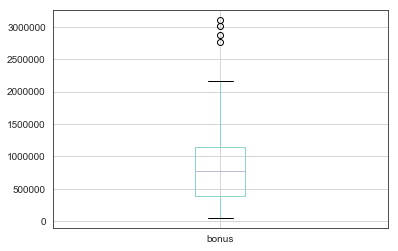

In [2760]:
X.boxplot(column="bonus")

In [2761]:
X['bonus']= X['bonus'].fillna(X['bonus'].median())
X['bonus'].head(3)

0    250000.0
1    625000.0
2    650000.0
Name: bonus, dtype: float64

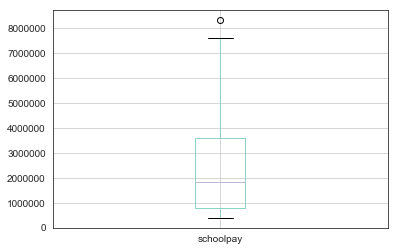

In [2762]:
X.boxplot(column="schoolpay")

In [2763]:
X['schoolpay']= X['schoolpay'].fillna(X['schoolpay'].median())
X['schoolpay'].head(3)

0    1700000.0
1    2000000.0
2    1100000.0
Name: schoolpay, dtype: float64

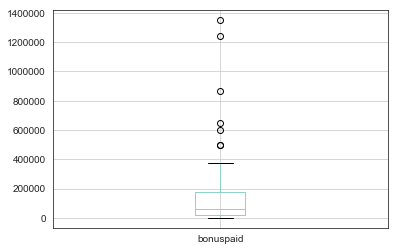

In [2764]:
X.boxplot(column="bonuspaid")

In [2765]:
X['bonuspaid']= X['bonuspaid'].fillna(X['bonuspaid'].median())
X['bonuspaid'].head(3)

0     63750.0
1         0.0
2    129000.0
Name: bonuspaid, dtype: float64

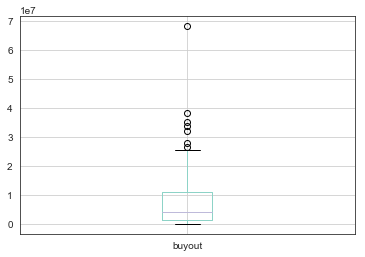

In [2766]:
X.boxplot(column="buyout")

In [2767]:
X['buyout']= X['buyout'].fillna(X['buyout'].median())
X['buyout'].head(3)

0    3587500.0
1    7100000.0
2    1000000.0
Name: buyout, dtype: float64

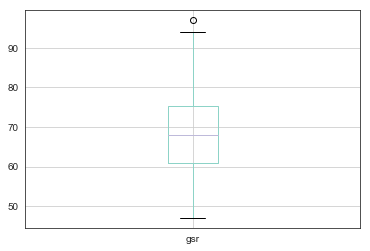

In [2768]:
X.boxplot(column="gsr")

In [2769]:
X['gsr']= X['gsr'].fillna(X['gsr'].mean())
#X['gsr'].isna().sum()
X['gsr'].head(3)

0    69.233333
1    65.000000
2    65.000000
Name: gsr, dtype: float64

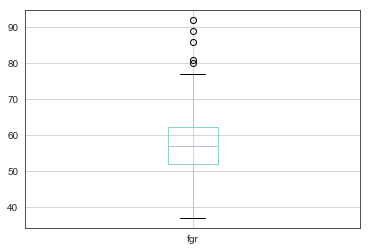

In [2770]:
X.boxplot(column="fgr")

In [2771]:
X['fgr']= X['fgr'].fillna(X['fgr'].median())
X['fgr'].head(3)

0    57.0
1    57.0
2    54.0
Name: fgr, dtype: float64

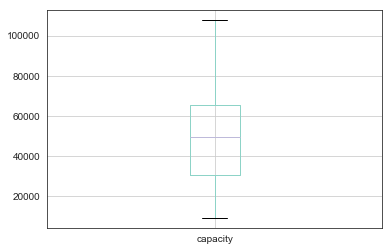

In [2772]:
X.boxplot(column="capacity")

In [2773]:
X['capacity']= X['capacity'].fillna(X['capacity'].mean())
X['capacity'].isna().sum()

0

In [2774]:
X.corr().abs()

,schoolpay,bonus,bonuspaid,buyout,capacity,latitude,longitude,gsr,fgr
schoolpay,1.000000,0.429027,0.409986,0.805180,0.806196,0.035737,0.059509,0.205615,0.156022
bonus,0.429027,1.000000,0.403646,0.364934,0.447904,0.013560,0.153656,0.050821,0.080806
bonuspaid,0.409986,0.403646,1.000000,0.414243,0.314102,0.084734,0.022373,0.111665,0.145734
buyout,0.805180,0.364934,0.414243,1.000000,0.659868,0.008839,0.027870,0.121250,0.087766
capacity,0.806196,0.447904,0.314102,0.659868,1.000000,0.102522,0.058891,0.117348,0.029376
latitude,0.035737,0.013560,0.084734,0.008839,0.102522,1.000000,0.056379,0.231602,0.210239
longitude,0.059509,0.153656,0.022373,0.027870,0.058891,0.056379,1.000000,0.042991,0.024780
gsr,0.205615,0.050821,0.111665,0.121250,0.117348,0.231602,0.042991,1.000000,0.780754
fgr,0.156022,0.080806,0.145734,0.087766,0.029376,0.210239,0.024780,0.780754,1.000000


In [2795]:
X.columns
X_clean=X
X_new=X_clean
X_new.columns
clean_set1=pd.concat([X_clean,y], axis=1)
clean_set1.head(3)

,bonus,bonuspaid,buyout,capacity,gsr,fgr,conference_AAC,conference_ACC,conference_Big_12,conference_Big_Ten,conference_C_USA,conference_Ind.,conference_MAC,conference_Mt._West,conference_Pac_12,conference_SEC,conference_Sun_Belt,totalpay
0,250000.0,63750.0,3587500.0,45323.0,69.233333,57.0,1,0,0,0,0,0,0,0,0,0,0,1700000.0
1,625000.0,0.0,7100000.0,40000.0,65.000000,57.0,1,0,0,0,0,0,0,0,0,0,0,2000000.0
2,650000.0,129000.0,1000000.0,40000.0,65.000000,54.0,1,0,0,0,0,0,0,0,0,0,0,1100000.0


In [2776]:
X_new.rename(columns={'conference_x': 'conference'}, inplace=True)
X_new.rename(columns={'state_x': 'state'}, inplace=True)
X_new.columns

Index(['school', 'conference', 'coach', 'schoolpay', 'bonus', 'bonuspaid',
       'buyout', 'stadium', 'city', 'state', 'capacity', 'latitude',
       'longitude', 'gsr', 'fgr'],
      dtype='object')

In [2777]:
conference_dummies=pd.get_dummies(X_new.conference, prefix='conference')#.iloc[:,1:]
conference_dummies.rename(columns={'conference_Big Ten': 'conference_Big_Ten'}, inplace=True)
conference_dummies.rename(columns={'conference_Big 12': 'conference_Big_12'}, inplace=True)
conference_dummies.rename(columns={'conference_Mt. West': 'conference_Mt._West'}, inplace=True)
conference_dummies.rename(columns={'conference_Pac-12': 'conference_Pac_12'}, inplace=True)
conference_dummies.rename(columns={'conference_Sun Belt': 'conference_Sun_Belt'}, inplace=True)
conference_dummies.rename(columns={'conference_C-USA': 'conference_C_USA'}, inplace=True)
conference_dummies.head(2)

,conference_AAC,conference_ACC,conference_Big_12,conference_Big_Ten,conference_C_USA,conference_Ind.,conference_MAC,conference_Mt._West,conference_Pac_12,conference_SEC,conference_Sun_Belt
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [2778]:
X_new=pd.concat([X_new,conference_dummies], axis=1)
X_new.columns

Index(['school', 'conference', 'coach', 'schoolpay', 'bonus', 'bonuspaid',
       'buyout', 'stadium', 'city', 'state', 'capacity', 'latitude',
       'longitude', 'gsr', 'fgr', 'conference_AAC', 'conference_ACC',
       'conference_Big_12', 'conference_Big_Ten', 'conference_C_USA',
       'conference_Ind.', 'conference_MAC', 'conference_Mt._West',
       'conference_Pac_12', 'conference_SEC', 'conference_Sun_Belt'],
      dtype='object')

In [2779]:
from sklearn.linear_model import LinearRegression
X=X_new[['bonus', 'bonuspaid',
       'buyout', 'capacity', 'gsr', 'fgr','conference_AAC', 'conference_ACC',
       'conference_Big_12', 'conference_Big_Ten', 'conference_C_USA',
       'conference_Ind.', 'conference_MAC', 'conference_Mt._West',
       'conference_Pac_12', 'conference_SEC', 'conference_Sun_Belt' ]]

model= LinearRegression().fit(X,y)


In [2780]:
model.score(X,y)

0.8931016793485183

In [2781]:
model.coef_
model.intercept_

465550.36327119544

In [2782]:
syr=X_new.loc[X_new.school=='Syracuse']
syr= syr[[ 'bonus', 'bonuspaid',
       'buyout', 'capacity', 'gsr', 'fgr', 'conference_AAC', 'conference_ACC',
       'conference_Big_12', 'conference_Big_Ten', 'conference_C_USA',
       'conference_Ind.', 'conference_MAC', 'conference_Mt._West',
       'conference_Pac_12', 'conference_SEC', 'conference_Sun_Belt']]
y_pred=model.predict(X)
y_pred[20]

2764649.704522842

In [2783]:
#Syracuse coach salary by doing the math
y_pred_math = model.intercept_ + np.sum(model.coef_ * syr, axis=1)
y_pred_math

20    2.764650e+06
dtype: float64

In [2784]:
y.corr(X_new['gsr'])

0.20465132547081605

In [2785]:
Coaches_Stadiums_Grad_rates.corr().abs()

,schoolpay,totalpay,bonus,bonuspaid,buyout,capacity,latitude,longitude,gsr,fgr
schoolpay,1.000000,0.999692,0.444401,0.491514,0.838880,0.806196,0.035737,0.059509,0.208242,0.156292
totalpay,0.999692,1.000000,0.447757,0.492325,0.841151,0.806247,0.032636,0.056948,0.207278,0.156172
bonus,0.444401,0.447757,1.000000,0.496681,0.359071,0.471265,0.010799,0.157673,0.110513,0.157583
bonuspaid,0.491514,0.492325,0.496681,1.000000,0.545029,0.404784,0.073079,0.031942,0.245265,0.298273
buyout,0.838880,0.841151,0.359071,0.545029,1.000000,0.689180,0.015978,0.048345,0.270087,0.216466
capacity,0.806196,0.806247,0.471265,0.404784,0.689180,1.000000,0.102522,0.058891,0.118263,0.027746
latitude,0.035737,0.032636,0.010799,0.073079,0.015978,0.102522,1.000000,0.056379,0.238843,0.216106
longitude,0.059509,0.056948,0.157673,0.031942,0.048345,0.058891,0.056379,1.000000,0.043362,0.023091
gsr,0.208242,0.207278,0.110513,0.245265,0.270087,0.118263,0.238843,0.043362,1.000000,0.826774
fgr,0.156292,0.156172,0.157583,0.298273,0.216466,0.027746,0.216106,0.023091,0.826774,1.000000


In [2786]:
model.score(X,y)

0.8931016793485183

In [2787]:
model.coef_
model.intercept_

465550.36327119544

In [2788]:
conferences = X_new.conference.unique()
conferences

array(['AAC', 'ACC', 'Big 12', 'Big Ten', 'C-USA', 'Ind.', 'MAC',
       'Mt. West', 'Pac-12', 'SEC', 'Sun Belt'], dtype=object)

In [2789]:
syr= syr[[ 'bonus', 'bonuspaid',
       'buyout', 'capacity', 'gsr', 'fgr', 'conference_AAC', 'conference_ACC',
       'conference_Big_12', 'conference_Big_Ten', 'conference_C_USA',
       'conference_Ind.', 'conference_MAC', 'conference_Mt._West',
       'conference_Pac_12', 'conference_SEC', 'conference_Sun_Belt']]

In [2790]:
syr

,bonus,bonuspaid,buyout,capacity,gsr,fgr,conference_AAC,conference_ACC,conference_Big_12,conference_Big_Ten,conference_C_USA,conference_Ind.,conference_MAC,conference_Mt._West,conference_Pac_12,conference_SEC,conference_Sun_Belt
20,775000.0,63750.0,4000000.0,49250.0,77.0,64.0,0,1,0,0,0,0,0,0,0,0,0


In [2791]:
syr_big_ten=syr.loc[syr.conference_ACC == 1, 'conference_ACC'] = 0
syr_big_ten=syr.loc[syr.conference_Big_Ten == 0, 'conference_Big_Ten'] = 1
syr_big_ten=syr
syr_big_ten


,bonus,bonuspaid,buyout,capacity,gsr,fgr,conference_AAC,conference_ACC,conference_Big_12,conference_Big_Ten,conference_C_USA,conference_Ind.,conference_MAC,conference_Mt._West,conference_Pac_12,conference_SEC,conference_Sun_Belt
20,775000.0,63750.0,4000000.0,49250.0,77.0,64.0,0,0,0,1,0,0,0,0,0,0,0


In [2792]:
y_pred=model.predict(syr_big_ten)
y_pred

array([3168309.50007188])